# Regression on Avocado Prices from 2015 to 2019

In [66]:
#importing the libraries I will need
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
#
from sklearn import metrics
from sklearn.metrics import r2_score
#
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#
import warnings
warnings.filterwarnings('ignore')

In [67]:
#importing the dataset and previewing the first 5 rows
df_avo = pd.read_csv('Avocado.csv')
df_avo.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [68]:
#dividing the dataset by the avocado's type
df_org = df_avo[df_avo['type']=='organic']
df_con = df_avo[df_avo['type']== 'conventional']

In [69]:
#sorting the values by date 
df_con =df_con.sort_values('Date')
df_org = df_org.sort_values('Date')

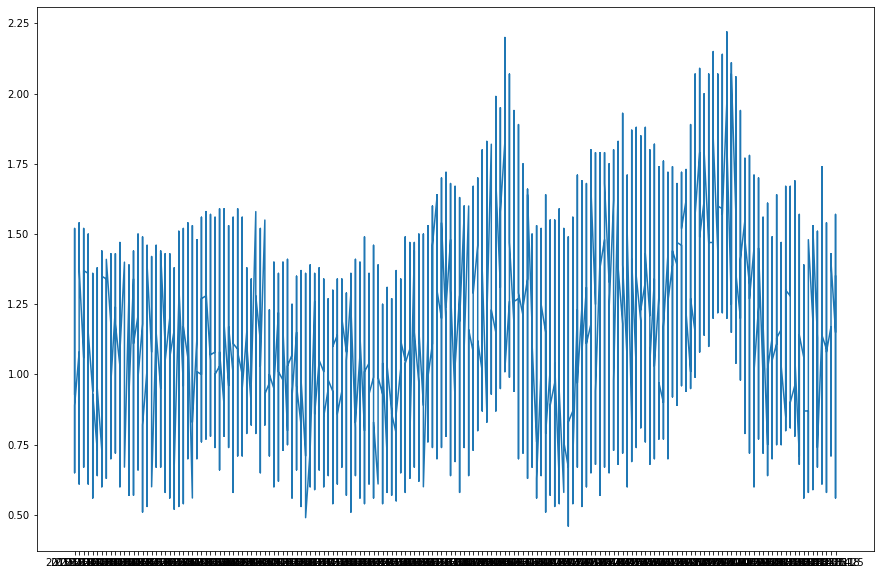

In [70]:
#graphic representation of the average price of 'conventional' avocados through time
fig, ax =plt.subplots(figsize=(15,10))
plt.plot(df_con['Date'], df_con['AveragePrice'])


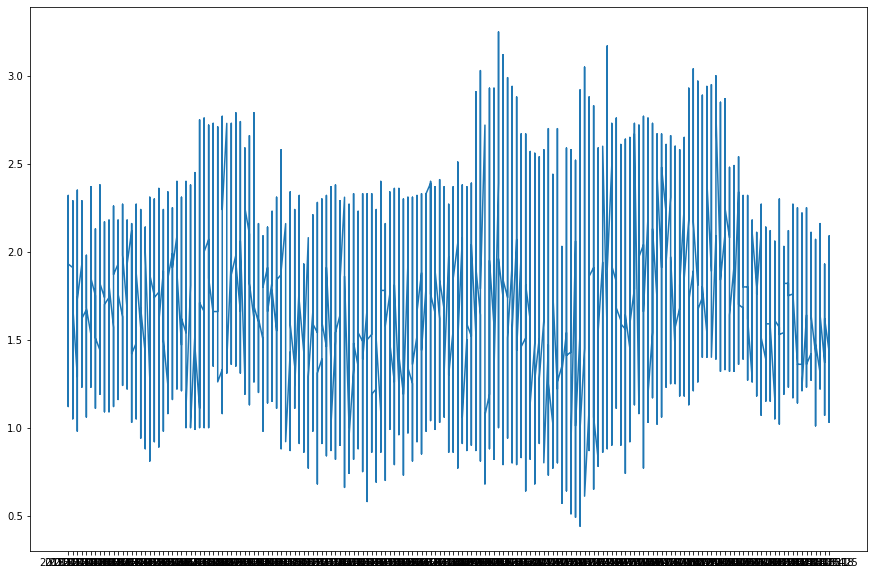

In [71]:
##graphic representation of the average price of 'organic' avocados through time
fig, ax =plt.subplots(figsize=(15,10))
plt.plot(df_org['Date'], df_org['AveragePrice'])

In [72]:
#splitting date column into 'Day' and 'Month' and dropping it
new = df_avo['Date'].str.split("-", n=2, expand=True)
df_avo['Month'] = new[1]
df_avo['Day']= new[2]
df_avo.drop(columns=['Date'], inplace=True)


In [73]:
#dropping 'Unnamed : 0' column
df_avo.drop(columns=['Unnamed: 0'], inplace=True)

In [74]:
#first 5 rows of the cleaned dataset
df_avo.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,06
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [75]:
df_org = df_avo[df_avo['type']=='organic']
df_con = df_avo[df_avo['type']== 'conventional']

In [76]:
#changing some data types
df_org['Month'] = df_org['Month'].astype('int64')
df_org['Day'] = df_org['Day'].astype('int64')
df_con['Month'] = df_con['Month'].astype('int64')
df_con['Day'] = df_con['Day'].astype('int64')
df_org.dtypes


AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
Month             int64
Day               int64
dtype: object

In [77]:
#creating dummies from categorical features
df_org = pd.get_dummies(df_org,drop_first = True)
df_con = pd.get_dummies(df_con,drop_first = True)

In [79]:
#dividing the dataset 
Y = df_con[['AveragePrice']][:]
X = df_con.drop(["AveragePrice"],axis=1,inplace=True)
X= df_con.iloc[:,1:]


In [80]:
#standardizing the values for the models
sc = StandardScaler()
x = sc.fit_transform(X)
y = sc.fit_transform(Y)

In [81]:
#splitting the dataset into training and testing sets
x_train, x_test,y_train, y_test= train_test_split(x,y, train_size=0.3)

In [82]:
#loading and valuating Linear Regression, Decision Treen Regressor, K Neighbors Regressor and Support Vector Regressor
models = []
models.append(('Linear Regression', LinearRegression()))
models.append(('Decision Trees', DecisionTreeRegressor()))
models.append(('K Nearest Neighbor',KNeighborsRegressor()))
models.append(('Support Vector', SVR()))
results = []
names = []
for i, j in models: 
    k = KFold(n_splits=10 , random_state=26)
    result = cross_val_score(j, x_train,y_train, cv=k, scoring='r2')
    results.append(result)
    names.append(i)
    print('Model: ', i,'Score: %.2f' % result.mean(), "Model's Standard Deviation: %.2f" % result.std())

Model:  Linear Regression Score: 0.51 Model's Standard Deviation: 0.03
Model:  Decision Trees Score: 0.63 Model's Standard Deviation: 0.05
Model:  K Nearest Neighbor Score: 0.56 Model's Standard Deviation: 0.04
Model:  Support Vector Score: 0.55 Model's Standard Deviation: 0.03


Text(0.5, 0, 'Model')

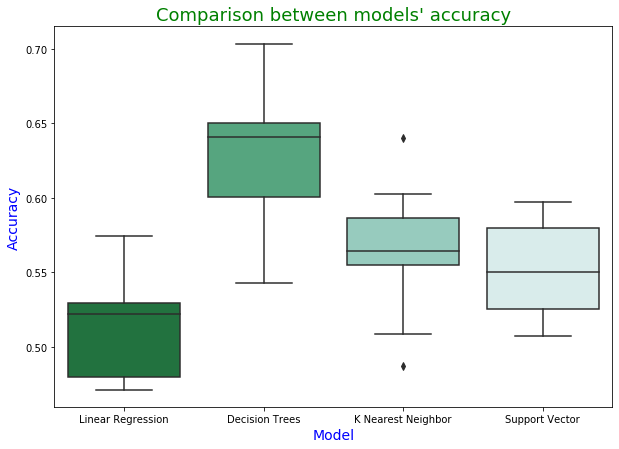

In [100]:
#graphic representation of the accuracy of every model used for regression
f,ax = plt.subplots(figsize = (10,7))
sns.boxplot(x=names, y=results,palette='BuGn_r')
plt.title("Comparison between models' accuracy", fontsize=18, color='green')
plt.ylabel('Accuracy', fontsize=14,color='blue')
plt.xlabel('Model',fontsize=14,color='blue')

The Decision Trees Regressor seems to be the one that performed better with an average accuracy of 63%.